# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Ignore Warnings and Set Plotting Style

In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

# Loading the Dataset

In [3]:
path = '/content/drive/MyDrive/Dataset/Advertising.csv'
df = pd.read_csv(path)

# Data Preprocessing

In [4]:
df = df.drop(columns="Unnamed: 0", axis=1)
print("First 5 rows of the dataset:\n", df.head())

First 5 rows of the dataset:
       TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


# Dataset Overview

In [5]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Checking for Missing and Duplicate Values


In [6]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Records: ", df.duplicated().sum())


Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Duplicate Records:  0


# Statistical Summary of the Dataset


In [7]:
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


# Correlation Matrix

In [8]:
print("\nCorrelation Matrix:\n", df.corr())


Correlation Matrix:
                  TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


# **Exploratory Data Analysis (EDA)**

# Boxplots to Identify Outliers in Features

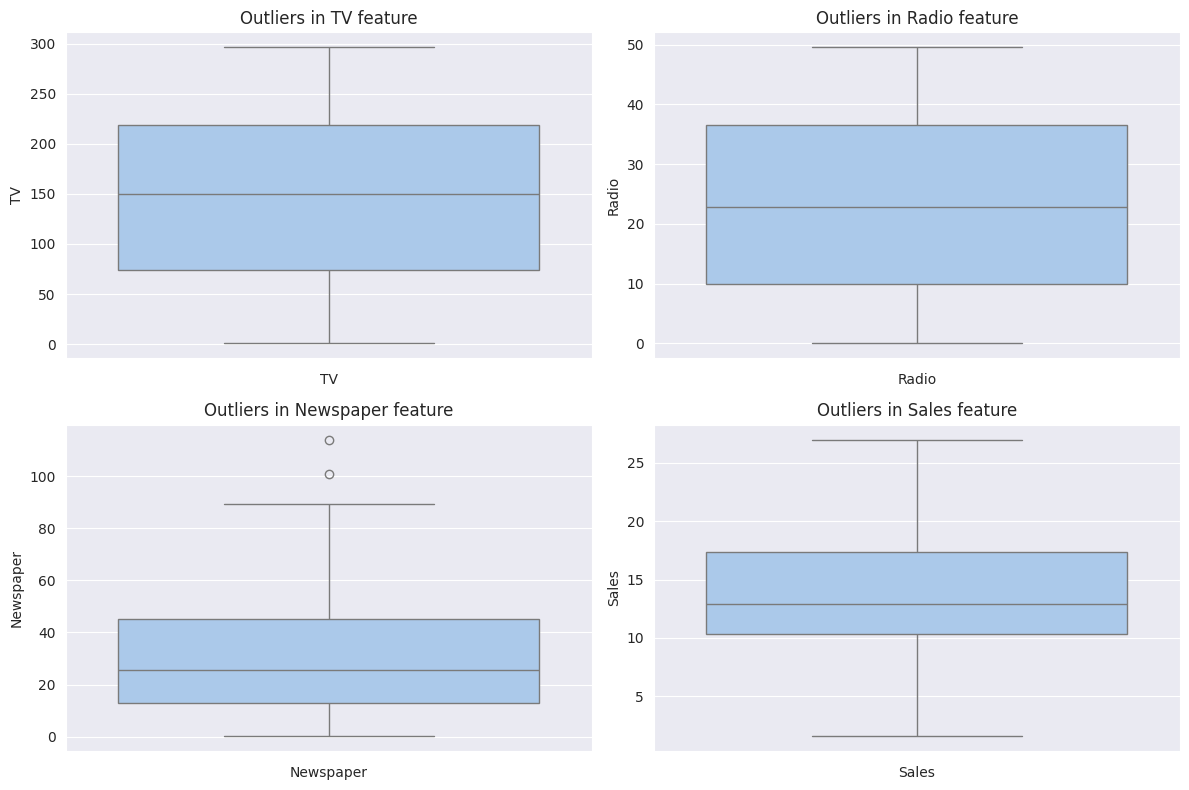

In [9]:
plt.figure(figsize=(12, 8))
columns = {0: "TV", 1: "Radio", 2: "Newspaper", 3: "Sales"}

for plot, col_name in columns.items():
    plt.subplot(2, 2, plot + 1)
    sns.boxplot(data=df[col_name], palette="pastel")
    plt.xlabel(col_name)
    plt.title(f"Outliers in {col_name} feature")

plt.tight_layout()
plt.show()

# Distribution Plots of Features vs Sales

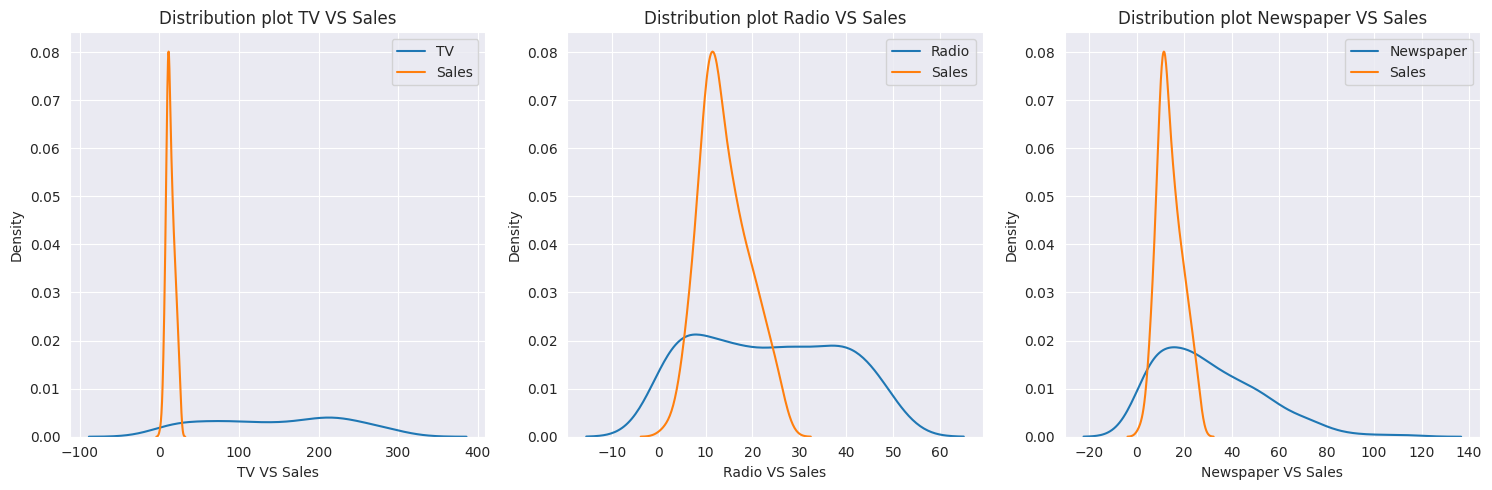

In [10]:
plt.figure(figsize=(15, 5))
columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.distplot(x=df[col_name], hist=False, label=col_name)
    sns.distplot(x=df["Sales"], hist=False, label="Sales")
    plt.xlabel(f"{col_name} VS Sales")
    plt.title(f"Distribution plot {col_name} VS Sales")
    plt.legend()

plt.tight_layout()
plt.show()

# Heatmap to Show Correlations

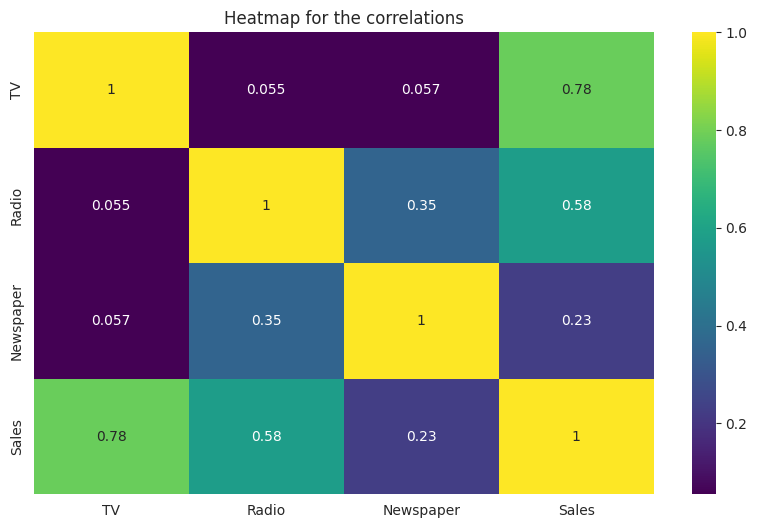

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.title("Heatmap for the correlations")
plt.show()

# Pairplot to Visualize Relationships Between Features and Sales

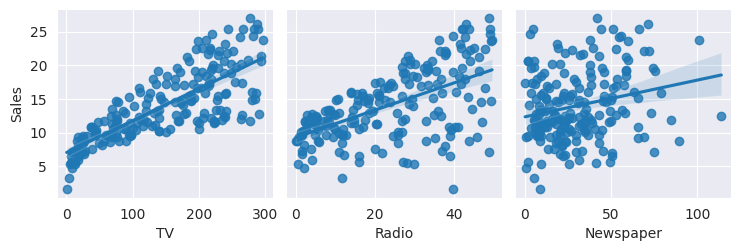

In [12]:
sns.pairplot(data=df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg", palette="pastel")
plt.show()

# Scatter Plots for Each Feature vs Sales

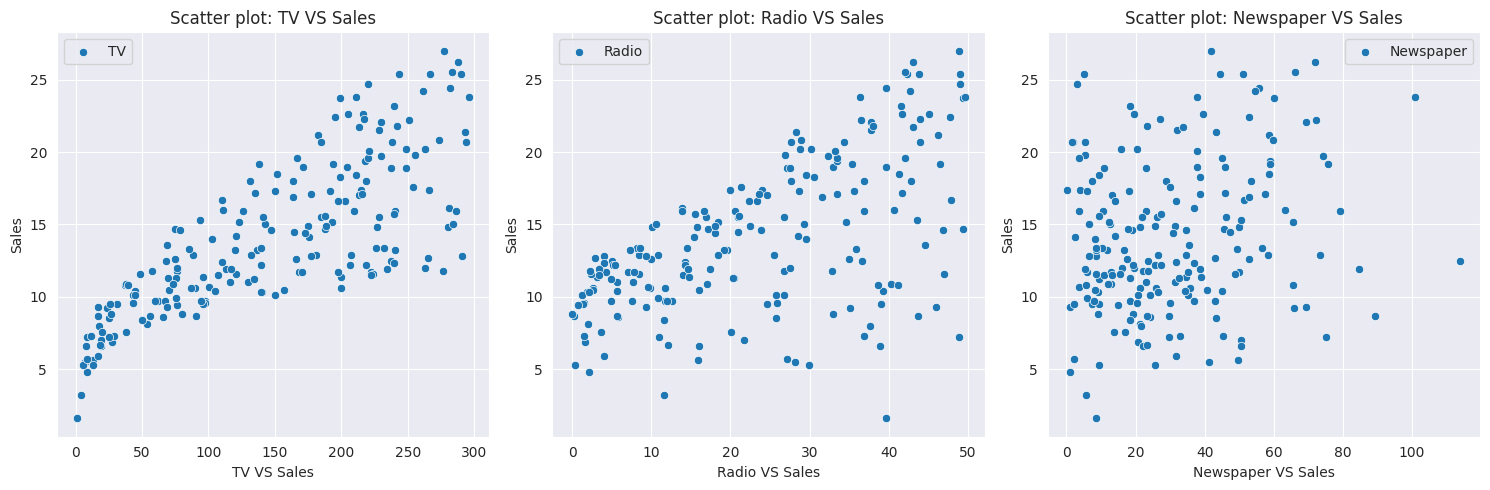

In [13]:
plt.figure(figsize=(15, 5))
columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.scatterplot(x=df[col_name], y=df["Sales"], label=col_name, palette="pastel")
    plt.xlabel(f"{col_name} VS Sales")
    plt.title(f"Scatter plot: {col_name} VS Sales")
    plt.legend()

plt.tight_layout()
plt.show()

# Complex Scatter Plot with Multiple Features

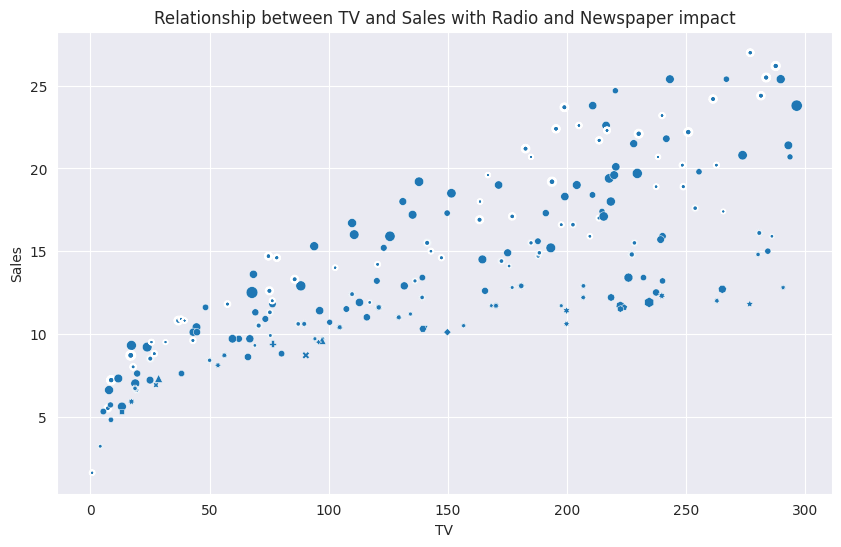

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="TV", y="Sales", style="Radio", size="Newspaper", palette="pastel", legend=False)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Relationship between TV and Sales with Radio and Newspaper impact")
plt.show()

# Histogram of All Features

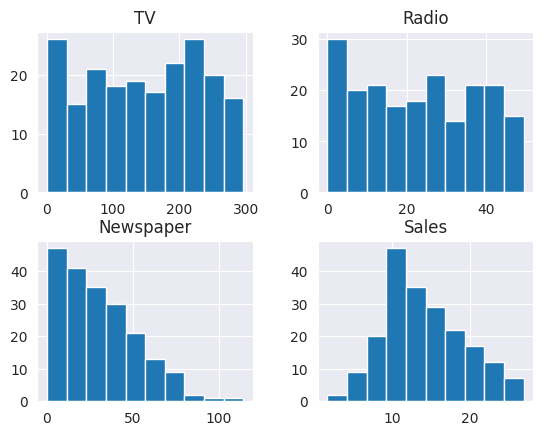

In [15]:
df.hist()
plt.show()

# **Model Training**

# Splitting the Dataset into Features (X) and Target (y)

In [16]:
X = df.drop(columns="Sales", axis=1)
y = df["Sales"]

# Encoding the Target Variable

In [17]:
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the Data into Training and Testing Sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the Features

In [19]:
scaler = MinMaxScaler()
scaler.fit(X_train, y_train)

MinMaxScaler()

In [20]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Model Evaluation**

# List of Regression Models to Train

In [21]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso())
]

# Evaluating Each Model

Linear Regression
Mean Squared Error: 108.88563941729085
R2 Score: 0.9137298616704539
Cross-Validation R2: 0.8829076766313095


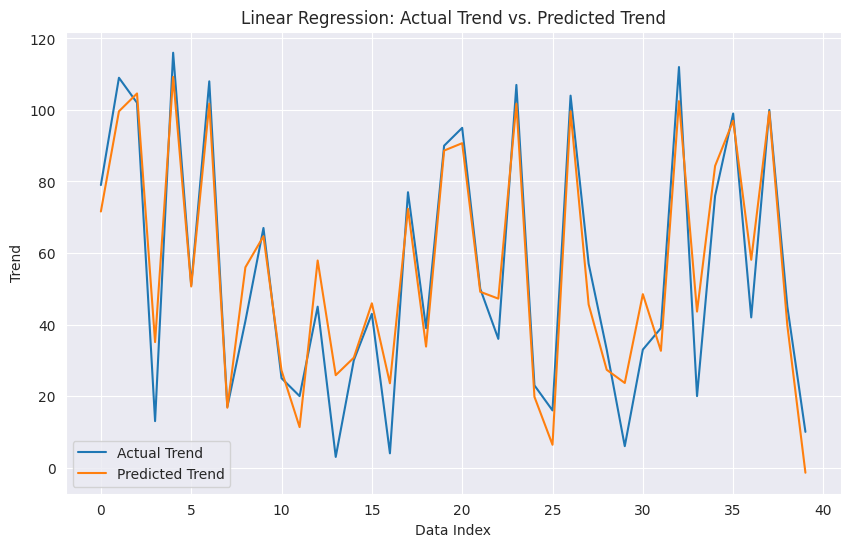


Ridge Regression
Mean Squared Error: 124.16557474271458
R2 Score: 0.9016235624261708
Cross-Validation R2: 0.8744917309227282


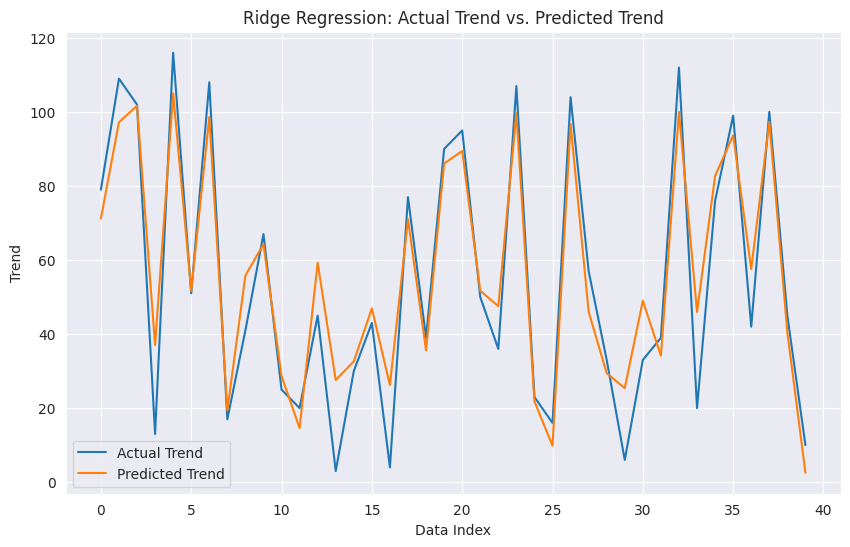


Lasso Regression
Mean Squared Error: 152.65126991931305
R2 Score: 0.8790543340462877
Cross-Validation R2: 0.8556271875371658


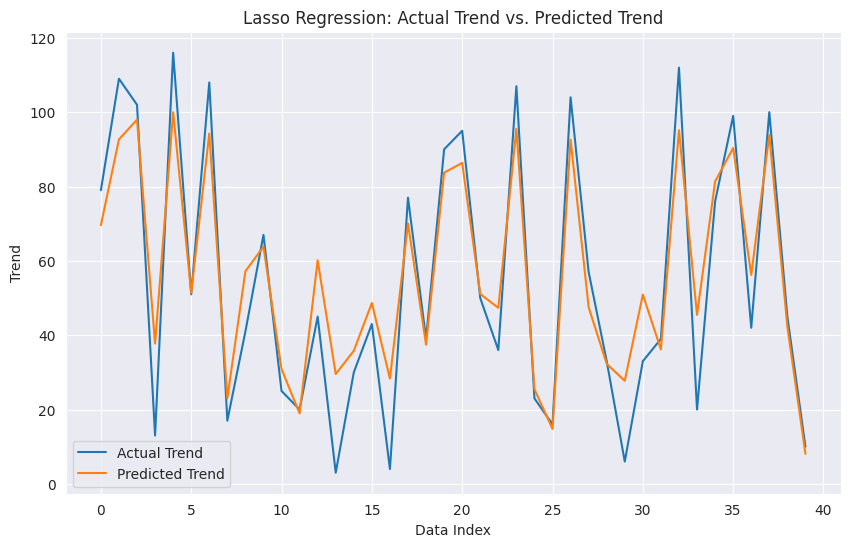

In [22]:
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

    print(f"{name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")
    print(f"Cross-Validation R2: {cv_scores.mean()}")

    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    print()


# **Model Testing**

# Testing the Linear Regression Model with New Inputs


In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# User Input for New Data

In [24]:
tv = float(input("Enter the TV value: "))
radio = float(input("Enter the Radio value: "))
news = float(input("Enter the Newspaper value: "))

Enter the TV value: 10
Enter the Radio value: 68
Enter the Newspaper value: 55


# Creating a DataFrame for New Input

In [25]:
new_data = pd.DataFrame({
    "TV": [tv],
    "Radio": [radio],
    "Newspaper": [news]
})

# Predicting Sales for New Input

In [26]:
new_pred_scaled = scaler.transform(new_data)
print("-------------------------------------")
new_pred = lr.predict(new_pred_scaled)
print(f"Predicted Sales: {abs(new_pred[0])}")

-------------------------------------
Predicted Sales: 9.03526712743266
